<a href="https://colab.research.google.com/github/hhnnhh/obfuscated_text_classification_AI/blob/main/Text_classifier_of_obfuscated_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### obfuscated text classifier
### by Dr. Hannah Bohle, 09.09.2020




**Table of Content:**
1. loading data as df
2. Exploratory Data Analysis of training and test data
4. Defining train_test_split from "train"
4. Baseline Model (Logistic Regression, SVM)
4. Neural Net: Long-Short-Term Memory (LSTM) Recurrent Neural Net (RNN)
4. Predicting labels of "test" data


**Task:**

Model is expected to classify a given line as belonging to one of the following 12 novels. The sentences of the novels have been obfuscated, however the patterns in them are preserved. 

Obfuscated text example: 
0: satwamuluhqgulamlrmvezuhqvkrpmletwulcitwskuhlejfjaskljfsklajeifuweiondov

Novels are: 

0: alice_in_wonderland
1: dracula
2: dubliners
3: great_expectations
4: hard_times
5: huckleberry_finn
6: les_miserable
7: moby_dick
8: oliver_twist
9: peter_pan
10: talw_of_two_cities
11: tom_sawyer

**Results:**
While simple machine learning algorithms such as Support Vector Machines achieve an accuracy of 0.34. A deep learning algorithm achieves 0.85 Hence, it performs much better. In this case, a Recurrent Neural Net (RNN) Long-Short-Term (LSTM) Neural Net was used. 

**Procedure:**

To construct a baseline, I trained a Logistic Regression and a SVM. In a next step, I constructed a Long Short Term Memory (LSTM) Recurrent Neural Net (RNN). 

I started with the LSTM RNN because it is very powerful when working with text sequences. However, when working with obfuscated text, the 
main advantage of a LSTM RNN - its capability of processing *sequential* data - is not 
beneficial as the obfuscation makes it impossible to use the sequential information. 

Hence, working with Convolutional NN might even gain better results. Therefore, for me, the next steps would probably be to investigate deep learning algorithms suitable for obfuscated text. 

Second, working with the hyperparameters such as learning rate and with helper functions such as EarlyStopping would probably also improve the accuracy of the given model. 

**Results:**

The EDA shows that the data set is imbalanced, number of available sequences is ranging from 500 char sequences (Alice in Wonderland) to 5000 char sequences (Moby Dick). Therefore, in addition to plotting the confusion matrix, I decided to observe the f1-score of the baseline models. 

As a baseline, a Logistic Regression and a Support Vector Machine were trained. Because of the obfuscation, only the frequency of the letters could be used ( = Bag of Words CountVectorizer on char level). As we can see, the f1-score was very different for the 12 books. The algorithm worked well on two of the books, #5: huckleberry_finn and #8: oliver_twist. 
However, the overall f1-score was around 0.38 for both models. In my opinion, this is not even a bad score, considering that the algorithm could only use the letter frequency for its prediction. 

Out of the box, the LSTM Recurrent Neural Net shows promising results with an accuracy of about 0.61. However, after 13 epochs it started to overfit. Therefore, in a next step I trained a model while implementing Early Stopping to prevent overfitting. The highest accuracy I received with this last model was around 0.85 (Early Stopping, restoring best weights). 






In [ ]:
import numpy as np 
import pandas as pd 
import re
#import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#Model Selection and Validation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [ ]:
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/SAP/'

In [ ]:
#data path:
data_xtest = path +"xtest_obfuscated.txt"
data_xtrain = path + "xtrain_obfuscated.txt"
data_ytrain = path + "ytrain.txt"


#data load
df_xtest = pd.read_table(data_xtest, header=None)
df_xtrain = pd.read_table(data_xtrain, header=None)
df_ytrain = pd.read_table(data_ytrain, header=None)

*exploring* the shape and content:


*   **xtrain** has 32513 obfuscated lines
*   **ytrain** has 32513 labels
*   **xtest** has 3000 unlabeled lines - to test model

In [ ]:
df_xtrain.shape

(32513, 1)

In [ ]:
#pd.set_option('display.max_colwidth', -1)
df_xtrain.head()

,0
0,satwamuluhqgulamlrmvezuhqvkrpmletwulcitwskuhle...
1,twmkiwpmqvtwleuhsaiwsktwmvlelekramuhqvkruhtwsk...
2,vidfpmskuhvilepmuluhtwtvuhulsovienamqvuhskiwmv...
3,raskleenkrlruhtwulenleengztwqvuhenuhsatvuhsktw...
4,dfenqvuhtwamqvuhqgtwiwtvenuluhqvijletwamulenxe...


In [ ]:
df_ytrain.shape

(32513, 1)

In [ ]:
df_xtest.shape

(3000, 1)

In [ ]:
df_xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32513 non-null  object
dtypes: object(1)
memory usage: 254.1+ KB


In [ ]:
df_ytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       32513 non-null  int64
dtypes: int64(1)
memory usage: 254.1 KB


In [ ]:
df_xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [ ]:
df_xtrain.head()

,0
0,satwamuluhqgulamlrmvezuhqvkrpmletwulcitwskuhle...
1,twmkiwpmqvtwleuhsaiwsktwmvlelekramuhqvkruhtwsk...
2,vidfpmskuhvilepmuluhtwtvuhulsovienamqvuhskiwmv...
3,raskleenkrlruhtwulenleengztwqvuhenuhsatvuhsktw...
4,dfenqvuhtwamqvuhqgtwiwtvenuluhqvijletwamulenxe...


In [ ]:
df_ytrain.head()

,0
0,7
1,3
2,8
3,3
4,4


In [ ]:
df_xtest

,0
0,tvletwgzkrqvuhtwamuluhpkskpmpmiwtvuhamqvmviwlr...
1,qvmvuhskleenmvviengzxyuhqvmvamguuhrakrpmsauhul...
2,twamuhulenamuluhskvienuhqgdftwmvmkletwulvimvuh...
3,sooatwqvvitwqvvipmviuhoaampmpmmwuhuhraulvikrpm...
4,lepmuhpmdfuluhtwletwdfuhtwletwamguuhuhraezpmpm...
...,...
2995,enuhqvenuhqgeztwtwulqvtwuhtwiwtvenletwskmvqvvi...
2996,qvtwmkpmezuhulqvkrskuhtwamuluhulenamuluhskvien...
2997,ezmvamuhtwskenezuhulenamuluhulmvuhqvendfuhulen...
2998,skvikrpmtvuhskleendfulkrpmuhtwamuluhtwletwamdf...


## Exploratory data analysis:
How many samples do we have for each class? Is the data set imbalanced?  

##### Trying to find out whether the number of sequences per classes is imbalanced. Yes, there is an imbalance with 10 times less sequences for #0 "Alice in Wonderland" than #7 "Moby Dick".


In [ ]:
df_ytrain[0].value_counts()

7     5097
6     4226
3     4023
8     3634
1     3459
10    3052
4     2337
5     2283
2     1471
11    1408
9      980
0      543
Name: 0, dtype: int64

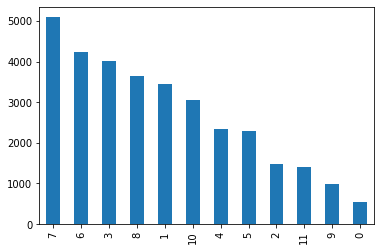

In [ ]:
df_ytrain[0].value_counts().sort_values(ascending=False).plot(kind='bar')

How long are the char sequences of the training data set?

In [ ]:
df_xtrain['charcount'] = df_xtrain[0].str.len()
df_xtrain
print ("The letter sequences in x_train contain between", max(df_xtrain['charcount']), "and", min(df_xtrain['charcount']), "letters")

The letter sequences in x_train contain between 452 and 168 letters


In [ ]:
df_xtest['charcount'] = df_xtest[0].str.len()
df_xtest
print ("The letter sequences in x_test contain between", max(df_xtest['charcount']), "and", min(df_xtest['charcount']), "letters")

The letter sequences in x_test contain between 448 and 72 letters


In [ ]:
df_xtrain = df_xtrain.drop(['charcount'], axis=1)
df_xtest = df_xtest.drop(['charcount'], axis=1)

In [ ]:
df_xtrain.shape

(32513, 1)

#Train test split - splitting data for training model

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_xtrain[0], df_ytrain[0], test_size=0.2, random_state=42)

# baseline model


## 1. LOGISTIC REGRESSION


For the baseline model, I use a simple "Bag of Words" tokenizer, which will not be used to tokenize words (due to obfuscation, words are not available), but will rather simply count the number of occurences of each letter. 

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='char')),  # char to token integer counts
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors with Logistic Regression
])

In [ ]:
pipeline.fit(x_train,y_train)
predictions = pipeline.predict(x_val)
print(classification_report(predictions,y_val))
print(confusion_matrix(predictions,y_val))
print(accuracy_score(predictions,y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.08      0.50      0.14        16
           1       0.43      0.34      0.38       868
           2       0.11      0.35      0.17        91
           3       0.38      0.30      0.34      1046
           4       0.26      0.40      0.32       305
           5       0.63      0.55      0.59       535
           6       0.35      0.31      0.33       946
           7       0.56      0.31      0.40      1717
           8       0.46      0.55      0.50       618
           9       0.02      0.27      0.04        15
          10       0.12      0.26      0.16       301
          11       0.04      0.27      0.07        45

    accuracy                           0.36      6503
   macro avg       0.29      0.37      0.29      6503
weighted avg       0.43      0.36      0.38      6503

[[  8   0   0   1   0   0   1   2   3   1   0   0]
 [  4 291  35  87  34  51 100  48  53  31  56  78]
 [  3   5  32   0   7   7  12  

## 2. SUPPORT VECTOR MACHINE

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='char')),  # strings to token integer counts
    ('classifier', svm.SVC()),  # train w/ Support Vector Machine
])

In [ ]:
pipeline.fit(x_train,y_train)
predictions = pipeline.predict(x_val)
print(classification_report(predictions,y_val))
print(confusion_matrix(predictions,y_val))
print(accuracy_score(predictions,y_val))

              precision    recall  f1-score   support

           0       0.02      0.29      0.04         7
           1       0.46      0.33      0.38       962
           2       0.05      0.52      0.08        25
           3       0.41      0.30      0.34      1142
           4       0.23      0.51      0.31       204
           5       0.61      0.57      0.59       506
           6       0.37      0.32      0.35       968
           7       0.64      0.29      0.40      2098
           8       0.40      0.69      0.50       427
           9       0.00      0.00      0.00         0
          10       0.07      0.28      0.11       162
          11       0.01      1.00      0.01         2

    accuracy                           0.36      6503
   macro avg       0.27      0.42      0.26      6503
weighted avg       0.48      0.36      0.39      6503

[[  2   0   0   0   1   0   1   1   2   0   0   0]
 [  5 313  44  94  53  70 100  57  59  34  61  72]
 [  0   0  13   0   3   5   2  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On some books, such as #5: huckleberry_finn and #8: oliver_twist the f1_score is not even bad (~.5). Overall, both, accuracy and f1-score are around .36. One must consider that the chance level for a classifier with 12 classes is around 0.083. 

(Some of the classes/books were not analysed, e.g. book #0, #2, #9, #11, and obviously the classifier will perform worse on books with a small number of data points (support). Therefore cross-validation seems to be a good idea. I started with a 3-fold cross-validation. In a next step, I would probably chose a higher k-fold and use the complete validation set.)


In [ ]:
scores = cross_val_score(pipeline,x_train,y_train,cv=3,
    scoring='f1_micro')

In [ ]:
scores

array([0.35732411, 0.34855825, 0.35374856])

Also with 3-fold cross-validation, the f1-scores for the SVM are around .36. Hence, for a multi-class classification problem with 12 possible classes the accuracy is still above chance. Even though the score is rather low, one must consider that the model infers its predictions solely from the frequency of the letters in the char sequences, therefore,in my opinion, the accuracy is not even bad. 

# RNN
In this part, I will have a look whether a Recurrent Neural Net might be able to beat the baseline of the simple Logistic Regression and Support Vector Machine. 

In [ ]:
#train test split (only needed if not used before)
x_train, x_val, y_train, y_val = train_test_split(df_xtrain[0], df_ytrain[0], test_size=0.2, random_state=42)


In [ ]:
# preprocessing
from keras.preprocessing.text import Tokenizer # converting letters to integers
from keras.preprocessing.sequence import pad_sequences # padding sequences to have sequences in equal length
import numpy as np 

In [ ]:
# Model 
from keras.models import Sequential, Model, Input
from keras.layers import Dense
from keras.layers import LSTM, Embedding, Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow import keras

In [ ]:
#preprocessing text data to be able to make predictions on the data later on
x_test = df_xtest[0]

In [ ]:
#x_train.head()
x_test.head()

0    tvletwgzkrqvuhtwamuluhpkskpmpmiwtvuhamqvmviwlr...
1    qvmvuhskleenmvviengzxyuhqvmvamguuhrakrpmsauhul...
2    twamuhulenamuluhskvienuhqgdftwmvmkletwulvimvuh...
3    sooatwqvvitwqvvipmviuhoaampmpmmwuhuhraulvikrpm...
4    lepmuhpmdfuluhtwletwdfuhtwletwamguuhuhraezpmpm...
Name: 0, dtype: object

In [ ]:
# Initialization: preprocessing text on character level 
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK') # oov_token: if given, it will be added to word_index and used to replace out-of-vocabulary char during text_to_sequence calls
# Fitting on data
tk.fit_on_texts(x_train)
tk.fit_on_texts(x_val)
tk.fit_on_texts(x_test)

In [ ]:
# which characters do we have and what is their corresponding number?
tk.word_index

{'UNK': 1,
 'a': 12,
 'b': 27,
 'c': 24,
 'd': 20,
 'e': 6,
 'f': 21,
 'g': 18,
 'h': 3,
 'i': 10,
 'j': 26,
 'k': 13,
 'l': 7,
 'm': 4,
 'n': 15,
 'o': 25,
 'p': 11,
 'q': 14,
 'r': 17,
 's': 16,
 't': 9,
 'u': 2,
 'v': 5,
 'w': 8,
 'x': 23,
 'y': 22,
 'z': 19}

In [ ]:
# Convert string to index 
train_sequences = tk.texts_to_sequences(x_train)
val_sequences = tk.texts_to_sequences(x_val)
test_sequences = tk.texts_to_sequences(x_test)

In [ ]:
# Padding - all instances should have the same length. I am using 430, as the length of the longest sequence in x_train was 426 letters (see above)
train_data = pad_sequences(train_sequences, maxlen=430, padding='post')
val_data = pad_sequences(val_sequences, maxlen=430, padding='post')
test_data = pad_sequences(test_sequences, maxlen=430, padding='post')


verifying the preprocessing procedure

In [ ]:
train_data.shape

(26010, 430)

In [ ]:
val_data.shape

(6503, 430)

In [ ]:
test_data.shape

(3000, 430)

converting data into numpy array

In [ ]:
# Convert sequences to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)
#test_data = np.array(test_data)

In [ ]:
# Convert classes to numpy array
train_classes = np.array(y_train)
val_classes = np.array(y_val)

In [ ]:
#how does it look like now? Okay. 
train_classes

array([4, 6, 7, ..., 7, 7, 3])

In [ ]:
#how does it look like now? Okay. 
val_classes

array([ 7, 10, 10, ...,  7,  3,  6])

## Model

creating model

In [ ]:
# defining LSTM with activation function Softmax due to multi-class labeling; dense 12 because of 12 classes
embed_dim = 128
lstm_out = 200
batch_size = 32

model = Sequential()
model.add(Embedding(30, embed_dim,input_length = train_data.shape[1]))
model.add(LSTM(lstm_out))
model.add(Dense(12,activation='softmax'))


compiling model

In [ ]:
#sparse categorical cross entropy: the labels are mutually exclusive for each data, meaning each data entry can only belong to one class.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 430, 128)          3840      
_________________________________________________________________
lstm (LSTM)                  (None, 200)               263200    
_________________________________________________________________
dense (Dense)                (None, 12)                2412      
Total params: 269,452
Trainable params: 269,452
Non-trainable params: 0
_________________________________________________________________
None


training model


In [ ]:
num_epochs = 25
history = model.fit(train_data, train_classes, epochs=num_epochs, validation_data=(val_data, val_classes), verbose=2)
model.save("/content/drive/My Drive/SAP/model_embed_25_epochs")

Epoch 1/25
813/813 - 922s - loss: 2.3110 - accuracy: 0.1721 - val_loss: 2.3047 - val_accuracy: 0.1647
Epoch 2/25
813/813 - 918s - loss: 2.2524 - accuracy: 0.2010 - val_loss: 2.2179 - val_accuracy: 0.2116
Epoch 3/25
813/813 - 916s - loss: 2.2295 - accuracy: 0.2027 - val_loss: 2.2033 - val_accuracy: 0.2038
Epoch 4/25
813/813 - 943s - loss: 2.1857 - accuracy: 0.2231 - val_loss: 2.0967 - val_accuracy: 0.2542
Epoch 5/25
813/813 - 926s - loss: 2.0498 - accuracy: 0.2661 - val_loss: 1.9864 - val_accuracy: 0.2843
Epoch 6/25
813/813 - 930s - loss: 1.9953 - accuracy: 0.2851 - val_loss: 1.9346 - val_accuracy: 0.2945
Epoch 7/25
813/813 - 940s - loss: 2.0039 - accuracy: 0.2812 - val_loss: 3.6209 - val_accuracy: 0.2462
Epoch 8/25
813/813 - 927s - loss: 1.8290 - accuracy: 0.3376 - val_loss: 1.7392 - val_accuracy: 0.3663
Epoch 9/25
813/813 - 924s - loss: 1.6733 - accuracy: 0.3895 - val_loss: 1.6550 - val_accuracy: 0.4010
Epoch 10/25
813/813 - 938s - loss: 1.5918 - accuracy: 0.4209 - val_loss: 1.5750 - 

*   plotting accuracy -> train_data vs. val_data
*   plotting loss --> train loss vs. val loss

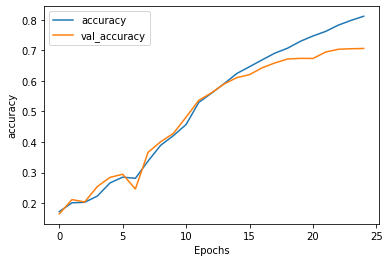

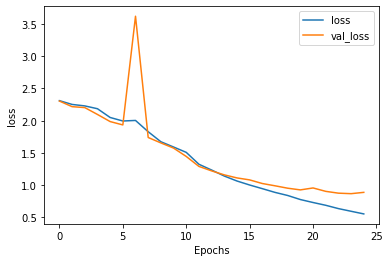

In [ ]:
# after training for 15 epochs, the model is overfitting (accuracy increases beyond 0.65, val_accuracy does not)
# Therefore, EarlyStopping should be implemented

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/SAP/model_embed_25_epochs")

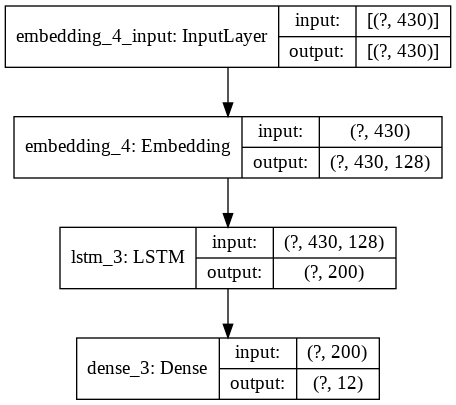

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
# implementing EarlyStopping
# defining LSTM with activation function Softmax due to multi-class labeling; dense 12 because of 12 classes
embed_dim = 128
lstm_out = 200
batch_size = 32

model2 = Sequential()
model2.add(Embedding(30, embed_dim,input_length = train_data.shape[1]))
model2.add(LSTM(lstm_out))
model2.add(Dense(12,activation='softmax'))
#sparse categorical cross entropy: the labels are mutually exclusive for each data, meaning each data entry can only belong to one class.
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 430, 128)          3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               263200    
_________________________________________________________________
dense_1 (Dense)              (None, 12)                2412      
Total params: 269,452
Trainable params: 269,452
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# second model trained - with early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("LSTM_with_EarlyStopping.h5",save_best_only=True)

num_epochs = 100
history2 = model2.fit(train_data, train_classes, epochs=num_epochs, validation_data=(val_data, val_classes), verbose=2,callbacks=[checkpoint_cb,early_stopping_cb])
model2.save("/content/drive/My Drive/SAP/model_embed_25_epochs/LSTM_with_EarlyStopping.h5")

Epoch 1/100
813/813 - 887s - loss: 2.3130 - accuracy: 0.1683 - val_loss: 2.3065 - val_accuracy: 0.1658
Epoch 2/100
813/813 - 866s - loss: 2.2687 - accuracy: 0.1917 - val_loss: 2.2301 - val_accuracy: 0.2013
Epoch 3/100
813/813 - 863s - loss: 2.1937 - accuracy: 0.2114 - val_loss: 2.1884 - val_accuracy: 0.2039
Epoch 4/100
813/813 - 844s - loss: 2.1770 - accuracy: 0.2124 - val_loss: 2.1624 - val_accuracy: 0.2062
Epoch 5/100
813/813 - 847s - loss: 2.1874 - accuracy: 0.2126 - val_loss: 2.1744 - val_accuracy: 0.2076
Epoch 6/100
813/813 - 858s - loss: 2.1571 - accuracy: 0.2185 - val_loss: 2.1714 - val_accuracy: 0.2054
Epoch 7/100
813/813 - 861s - loss: 2.1520 - accuracy: 0.2215 - val_loss: 2.1700 - val_accuracy: 0.2051
Epoch 8/100
813/813 - 858s - loss: 2.1444 - accuracy: 0.2268 - val_loss: 2.1534 - val_accuracy: 0.2130
Epoch 9/100
813/813 - 866s - loss: 1.9981 - accuracy: 0.2896 - val_loss: 1.8536 - val_accuracy: 0.3366
Epoch 10/100
813/813 - 884s - loss: 1.8425 - accuracy: 0.3412 - val_loss:

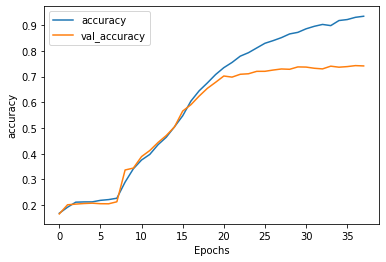

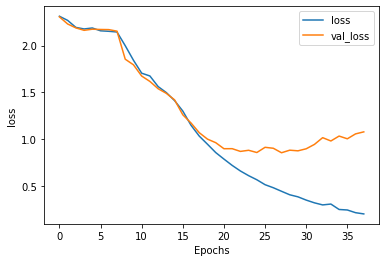

In [ ]:
def plot_graphs(history, string):
  plt.plot(history2.history[string])
  plt.plot(history2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

## Evaluation of model using test data

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model2.evaluate(train_data, train_classes, batch_size=32)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model2.predict(train_data[:3])
print("predictions shape:", predictions.shape)


Evaluate on test data
813/813 [==============================] - 254s 313ms/step - loss: 0.4028 - accuracy: 0.8716
test loss, test acc: [0.4028379023075104, 0.871587872505188]
Generate predictions for 3 samples
predictions shape: (3, 12)


# Validation

Now, predictions are made on test_data

In [ ]:
# make a prediction
test_classes = model2.predict_classes(test_data)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (test_data, test_classes))

X=[[ 9  5  7 ... 13  0  0]
 [14  5  4 ...  0  0  0]
 [ 9  8 12 ...  0  0  0]
 ...
 [ 6 19  4 ...  0  0  0]
 [16 13  5 ...  0  0  0]
 [ 9  8 12 ...  0  0  0]], Predicted=[ 6  1  8 ...  2  7 11]


In [ ]:
test_classes.shape

(3000,)

In [ ]:
# it is not necessary to revert the numerical encoding, using the original x_test instead
#text = tk.sequences_to_texts(test_data)

In [ ]:
# test_classes are converted to Series - to be able to concat with test_data
classes = pd.Series(test_classes)

In [ ]:
#classes = test_classes.tolist()
print(type(classes))
print(type(x_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
df = pd.concat([classes,x_test],axis=1)

In [ ]:
df.head()

,0,0
0,6,tvletwgzkrqvuhtwamuluhpkskpmpmiwtvuhamqvmviwlr...
1,1,qvmvuhskleenmvviengzxyuhqvmvamguuhrakrpmsauhul...
2,8,twamuhulenamuluhskvienuhqgdftwmvmkletwulvimvuh...
3,8,sooatwqvvitwqvvipmviuhoaampmpmmwuhuhraulvikrpm...
4,4,lepmuhpmdfuluhtwletwdfuhtwletwamguuhuhraezpmpm...


In [ ]:
df.to_csv("/content/drive/My Drive/SAP/prediction_bohle.txt",index=False)